In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [ ]:
tf.set_random_seed(1)
np.random.seed(1)

In [ ]:
x=np.linspace(-1,1,100)[:,np.newaxis]
y=x**2


In [37]:
y.dtype
x1.dtype

dtype('float64')

In [ ]:
plt.scatter(x,y)

In [40]:
noise=np.random.normal(0,0.1,size=x.shape)
x1=x+noise
print(x1.shape)
print(y.shape)

(100, 1)
(100, 1)


In [ ]:
plt.scatter(x1,y)

In [47]:
X=tf.placeholder(tf.float64,shape=list(x1.shape))
Y=tf.placeholder(tf.float64,shape=list(y.shape))

In [48]:
out=tf.layers.dense(X,10,tf.nn.relu)
out=tf.layers.dense(out,1)

In [61]:
loss=tf.losses.mean_squared_error(Y,out)
optimize=tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)

In [62]:
nepochs=100

In [63]:
s=tf.Session()
s.run(tf.global_variables_initializer())

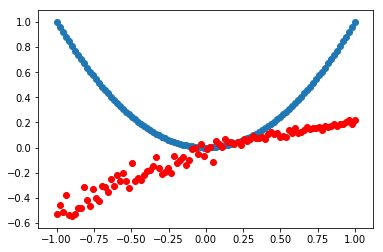

In [ ]:
for i in range(nepochs):
    _,l,ypred=s.run([optimize,loss,out],feed_dict={X:x1,Y:y})
    
    if i%5==0:
        plt.cla()
        plt.scatter(x,y)
        plt.scatter(x,ypred,c='r')
        plt.pause(0.1)
    